In [3]:
from importlib import reload

import io
import pathlib
import numpy as np
import pandas as pd

import fitsio
import matplotlib.pyplot as plt
import pyds9

In [8]:
from ics.hxutils import nirander
from ics.hxutils import hxstack as hx
reload(nirander)
reload(hx)

cam = 'n1'
meade = nirander.NirIlluminator(forceLedOff=False)

2020-05-05 15:56:06.005Z root             30 spectroIds.py:38 no "pfs-site." record found in DNS, using "Z"
2020-05-05 15:56:06.007Z butler           10 butler.py:73 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fb239a457c0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName:}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'temp

In [9]:
#d1085_92 = pyds9.DS9('disp4', start=True)
#d1085_112 = pyds9.DS9('disp5', start=True)
#d1085_122 = pyds9.DS9('disp6', start=True)
#d970_104 = pyds9.DS9('disp7', start=True)

d1 = pyds9.DS9('disp1', start=True)
d2 = pyds9.DS9('disp2', start=True)

In [176]:
s_1085_112 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    6988  33468  14179    112           0          0
1    6989  33468  14181    112           0          0
2    6990  33468  14183    112           0          0
3    6991  33473  14179    112           0          0
4    6992  33473  14181    112           0          0
5    6993  33473  14183    112           0          0
6    6994  33478  14179    112           0          0
7    6995  33478  14181    112           0          0
8    6996  33478  14183    112           0          0
9    6997  33468  14179    112           0          0
10   6998  33468  14181    112           0          0
11   6999  33468  14183    112           0          0
12   7000  33473  14179    112           0          0
13   7001  33473  14181    112           0          0
14   7002  33473  14183    112           0          0
15   7003  33478  14179    112           0          0
16   7004  33478  14181    112           0          0
17   7005  33478  14183    112           0          0
18   7006  33468  14179    112           0          0
19   7007  33468  14181    112           0          0
20   7008  33468  14183    112           0          0
21   7009  33473  14179    112           0          0
22   7010  33473  14181    112           0          0
23   7011  33473  14183    112           0          0
24   7012  33478  14179    112           0          0
25   7013  33478  14181    112           0          0
26   7014  33478  14183    112           0          0
27   7015  33468  14179    112           0          0
28   7016  33468  14181    112           0          0
29   7017  33468  14183    112           0          0
30   7018  33473  14179    112           0          0
31   7019  33473  14181    112           0          0
32   7020  33473  14183    112           0          0
33   7021  33478  14179    112           0          0
34   7022  33478  14181    112           0          0
35   7023  33478  14183    112           0          0
36   7024  33468  14179    112           0          0
37   7025  33468  14181    112           0          0
38   7026  33468  14183    112           0          0
39   7027  33473  14179    112           0          0
40   7028  33473  14181    112           0          0
41   7029  33473  14183    112           0          0
42   7030  33478  14179    112           0          0
43   7031  33478  14181    112           0          0
44   7032  33478  14183    112           0          0
"""

s_1085_92 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7033  33468  14179     92           0          0
1    7034  33468  14181     92           0          0
2    7035  33468  14183     92           0          0
3    7036  33473  14179     92           0          0
4    7037  33473  14181     92           0          0
5    7038  33473  14183     92           0          0
6    7039  33478  14179     92           0          0
7    7040  33478  14181     92           0          0
8    7041  33478  14183     92           0          0
9    7042  33468  14179     92           0          0
10   7043  33468  14181     92           0          0
11   7044  33468  14183     92           0          0
12   7045  33473  14179     92           0          0
13   7046  33473  14181     92           0          0
14   7047  33473  14183     92           0          0
15   7048  33478  14179     92           0          0
16   7049  33478  14181     92           0          0
17   7050  33478  14183     92           0          0
18   7051  33468  14179     92           0          0
19   7052  33468  14181     92           0          0
20   7053  33468  14183     92           0          0
21   7054  33473  14179     92           0          0
22   7055  33473  14181     92           0          0
23   7056  33473  14183     92           0          0
24   7057  33478  14179     92           0          0
25   7058  33478  14181     92           0          0
26   7059  33478  14183     92           0          0
27   7060  33468  14179     92           0          0
28   7061  33468  14181     92           0          0
29   7062  33468  14183     92           0          0
30   7063  33473  14179     92           0          0
31   7064  33473  14181     92           0          0
32   7065  33473  14183     92           0          0
33   7066  33478  14179     92           0          0
34   7067  33478  14181     92           0          0
35   7068  33478  14183     92           0          0
36   7069  33468  14179     92           0          0
37   7070  33468  14181     92           0          0
38   7071  33468  14183     92           0          0
39   7072  33473  14179     92           0          0
40   7073  33473  14181     92           0          0
41   7074  33473  14183     92           0          0
42   7075  33478  14179     92           0          0
43   7076  33478  14181     92           0          0
44   7077  33478  14183     92           0          0
"""

s_1085_122 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7078  33468  14179    132           0          0
1    7079  33468  14181    132           0          0
2    7080  33468  14183    132           0          0
3    7081  33473  14179    132           0          0
4    7082  33473  14181    132           0          0
5    7083  33473  14183    132           0          0
6    7084  33478  14179    132           0          0
7    7085  33478  14181    132           0          0
8    7086  33478  14183    132           0          0
9    7087  33468  14179    132           0          0
10   7088  33468  14181    132           0          0
11   7089  33468  14183    132           0          0
12   7090  33473  14179    132           0          0
13   7091  33473  14181    132           0          0
14   7092  33473  14183    132           0          0
15   7093  33478  14179    132           0          0
16   7094  33478  14181    132           0          0
17   7095  33478  14183    132           0          0
18   7096  33468  14179    132           0          0
19   7097  33468  14181    132           0          0
20   7098  33468  14183    132           0          0
21   7099  33473  14179    132           0          0
22   7100  33473  14181    132           0          0
23   7101  33473  14183    132           0          0
24   7102  33478  14179    132           0          0
25   7103  33478  14181    132           0          0
26   7104  33478  14183    132           0          0
27   7105  33468  14179    132           0          0
28   7106  33468  14181    132           0          0
29   7107  33468  14183    132           0          0
30   7108  33473  14179    132           0          0
31   7109  33473  14181    132           0          0
32   7110  33473  14183    132           0          0
33   7111  33478  14179    132           0          0
34   7112  33478  14181    132           0          0
35   7113  33478  14183    132           0          0
36   7114  33468  14179    132           0          0
37   7115  33468  14181    132           0          0
38   7116  33468  14183    132           0          0
39   7117  33473  14179    132           0          0
40   7118  33473  14181    132           0          0
41   7119  33473  14183    132           0          0
42   7120  33478  14179    132           0          0
43   7121  33478  14181    132           0          0
44   7122  33478  14183    132           0          0
"""

In [177]:
s_970_104 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7220  52588   4703  104.5           0          0
1    7221  52588   4705  104.5           0          0
2    7222  52588   4707  104.5           0          0
3    7223  52588   4709  104.5           0          0
4    7224  52593   4703  104.5           0          0
5    7225  52593   4705  104.5           0          0
6    7226  52593   4707  104.5           0          0
7    7227  52593   4709  104.5           0          0
8    7228  52598   4703  104.5           0          0
9    7229  52598   4705  104.5           0          0
10   7230  52598   4707  104.5           0          0
11   7231  52598   4709  104.5           0          0
12   7232  52603   4703  104.5           0          0
13   7233  52603   4705  104.5           0          0
14   7234  52603   4707  104.5           0          0
15   7235  52603   4709  104.5           0          0
16   7236  52588   4703  104.5           0          0
17   7237  52588   4705  104.5           0          0
18   7238  52588   4707  104.5           0          0
19   7239  52588   4709  104.5           0          0
20   7240  52593   4703  104.5           0          0
21   7241  52593   4705  104.5           0          0
22   7242  52593   4707  104.5           0          0
23   7243  52593   4709  104.5           0          0
24   7244  52598   4703  104.5           0          0
25   7245  52598   4705  104.5           0          0
26   7246  52598   4707  104.5           0          0
27   7247  52598   4709  104.5           0          0
28   7248  52603   4703  104.5           0          0
29   7249  52603   4705  104.5           0          0
30   7250  52603   4707  104.5           0          0
31   7251  52603   4709  104.5           0          0
32   7252  52588   4703  104.5           0          0
33   7253  52588   4705  104.5           0          0
34   7254  52588   4707  104.5           0          0
35   7255  52588   4709  104.5           0          0
36   7256  52593   4703  104.5           0          0
37   7257  52593   4705  104.5           0          0
38   7258  52593   4707  104.5           0          0
39   7259  52593   4709  104.5           0          0
40   7260  52598   4703  104.5           0          0
41   7261  52598   4705  104.5           0          0
42   7262  52598   4707  104.5           0          0
43   7263  52598   4709  104.5           0          0
44   7264  52603   4703  104.5           0          0
45   7265  52603   4705  104.5           0          0
46   7266  52603   4707  104.5           0          0
47   7267  52603   4709  104.5           0          0
48   7268  52588   4703  104.5           0          0
49   7269  52588   4705  104.5           0          0
50   7270  52588   4707  104.5           0          0
51   7271  52588   4709  104.5           0          0
52   7272  52593   4703  104.5           0          0
53   7273  52593   4705  104.5           0          0
54   7274  52593   4707  104.5           0          0
55   7275  52593   4709  104.5           0          0
56   7276  52598   4703  104.5           0          0
57   7277  52598   4705  104.5           0          0
58   7278  52598   4707  104.5           0          0
59   7279  52598   4709  104.5           0          0
60   7280  52603   4703  104.5           0          0
61   7281  52603   4705  104.5           0          0
62   7282  52603   4707  104.5           0          0
63   7283  52603   4709  104.5           0          0
64   7284  52588   4703  104.5           0          0
65   7285  52588   4705  104.5           0          0
66   7286  52588   4707  104.5           0          0
67   7287  52588   4709  104.5           0          0
68   7288  52593   4703  104.5           0          0
69   7289  52593   4705  104.5           0          0
70   7290  52593   4707  104.5           0          0
71   7291  52593   4709  104.5           0          0
72   7292  52598   4703  104.5           0          0
73   7293  52598   4705  104.5           0          0
74   7294  52598   4707  104.5           0          0
75   7295  52598   4709  104.5           0          0
76   7296  52603   4703  104.5           0          0
77   7297  52603   4705  104.5           0          0
78   7298  52603   4707  104.5           0          0
79   7299  52603   4709  104.5           0          0
"""

In [8]:
reload(nirander)
newFrames1 = pd.read_csv('/data/redux/n1/20200408/n1_dither_full/measures-008268-n1.txt', delimiter='\s+')
newFrames2 = pd.read_csv('/data/redux/n1/20200410/n1_dither_full_2/measures-010401-n1.txt', delimiter='\s+')

newFrames1 = newFrames1[newFrames1.wavelength != 970]

newFrames = pd.concat([newFrames1, newFrames2], ignore_index=True).copy()

2020-04-30 14:33:37.053Z root             30 spectroIds.py:38 no "pfs-site." record found in DNS, using "Z"
2020-04-30 14:33:37.055Z butler           10 butler.py:73 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7f98a1829050>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName:}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'temp

In [10]:
newFrames = pd.read_csv('/data/redux/n1/20200429/n1_dither_newmask/measures-013120-n1.txt', delimiter='\s+').copy()

In [13]:
newFrames.wavelength.unique()

array([1300, 1200, 1085, 1070, 1050,  970,  930])

In [11]:
badMask = fitsio.read('/data/redux/n1/calibs/mask-009000-n1.fits').astype('bool')
dark = nirander.nirButler.get('dark', visit=13108)
hxCalib = hx.HxCalib(cam=cam, darkStack=dark, badMask=badMask)

2020-05-05 15:59:10.140Z butler           10 butler.py:261 loading dark from /data/redux/n1/calibs/dark-013108-n1.fits, using ics.hxutils.darkCube.load()


In [44]:
ionpump = [('2020-05-07T10:42:11', 12.0),
          ('2020-05-07T10:42:37', 10.0),
          ('2020-05-07T10:45:16', 9.2),
          ('2020-05-07T10:49:35', 8.1),
          ('2020-05-07T10:55:21', 7.2),
          ('2020-05-07T11:04:08', 6.0),
          #('2020-05-07T11:00:00', 5.1),
          ('2020-05-07T11:11:33', 5.0),
          ('2020-05-07T13:10:12', 1.0),
          ]
ipFrame = np.array(ionpump, dtype=dict(names=('time', 'current'), formats=('datetime64[s]', np.float32)))
ipFrame

array([('2020-05-07T10:42:11', 12. ), ('2020-05-07T10:42:37', 10. ),
       ('2020-05-07T10:45:16',  9.2), ('2020-05-07T10:49:35',  8.1),
       ('2020-05-07T10:55:21',  7.2), ('2020-05-07T11:04:08',  6. ),
       ('2020-05-07T11:11:33',  5. ), ('2020-05-07T13:10:12',  1. )],
      dtype=[('time', '<M8[s]'), ('current', '<f4')])

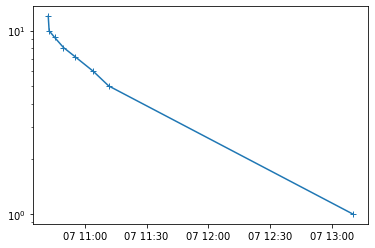

In [54]:
plt.plot(ipFrame['time'], ipFrame['current'], '+-')
p = plt.gca()
p.set_yscale('log')

In [14]:
meade.leds

,wave,dutyCycle,focusOffset,position
wave,,,,
1300,1300,100.0,4.0,3984
1200,1200,33.0,0.0,3664
1085,1085,30.0,0.0,2700
1070,1070,33.0,0.0,2457
1050,1050,19.0,0.0,2274
970,970,83.0,0.0,846
930,930,40.0,-10.0,100


In [12]:
d1.set_np2arr(hxCalib.isr(visit=8316))

1

In [60]:
reload(nirander)
ret = []
for w in meade.leds.wave:
    print(f"measuring {w}")
    
    ret.append(nirander.measureSet(newFrames.loc[newFrames.wavelength == w].copy(), hxCalib, radius=80))
    

2020-04-30 19:52:54.463Z root             30 spectroIds.py:38 no "pfs-site." record found in DNS, using "Z"
2020-04-30 19:52:54.465Z butler           10 butler.py:73 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7f98a3373850>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName:}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'temp

measuring 1300
    : i=0, visit=13120
    : i=1, visit=13121
    : i=2, visit=13122
    : i=3, visit=13123
    : i=4, visit=13124
    : i=5, visit=13125
got 2 spots near [[3983.6512939  1999.67750308]]
nope: i=6, scan=visit         13126.0
xstep          3771.0
ystep         13964.0
focus            92.0
wavelength     1300.0
dutyCycle       100.0
x2                NaN
y2                NaN
xpix              NaN
ypix              NaN
flux              NaN
peak              NaN
size              NaN
Name: 6, dtype: float64
    : i=7, visit=13127
    : i=8, visit=13128
    : i=9, visit=13129
    : i=10, visit=13130
    : i=11, visit=13131
    : i=12, visit=13132
    : i=13, visit=13133
    : i=14, visit=13134
    : i=15, visit=13135
    : i=16, visit=13136
    : i=17, visit=13137
    : i=18, visit=13138
    : i=19, visit=13139
    : i=20, visit=13140
    : i=21, visit=13141
    : i=22, visit=13142
    : i=23, visit=13143
    : i=24, visit=13144
    : i=25, visit=13145
    : i=26, visit=1

In [61]:
newMeas = pd.concat(ret, ignore_index=True).copy()

In [64]:
reMeas = nirander.measureSet(newMeas[newMeas.xpix.isna()], hxCalib, thresh=1000)
reMeas

    : i=6, visit=13126
    : i=59, visit=13179
    : i=254, visit=13374
    : i=470, visit=13590
    : i=511, visit=13631
    : i=722, visit=13804


,visit,xstep,ystep,focus,wavelength,dutyCycle,x2,y2,xpix,ypix,flux,peak,size
6,13126,3771,13964,92.0,1300,100,0.715351,0.485265,3986.736647,1994.833794,21311.722656,4841.797852,0.600308
59,13179,3766,13968,122.0,1300,100,0.742420,0.581014,3987.577799,1995.604535,22786.769531,5217.189941,0.661717
254,13374,8136,13964,152.0,1200,33,0.903277,0.820690,3664.780978,1995.895768,51589.148438,13010.150391,0.861984
470,13590,24645,13950,122.0,1070,33,0.739463,0.770889,2455.804374,1995.421235,60554.046875,16186.335938,0.755176
511,13631,24655,13948,137.0,1070,33,0.762362,0.699630,2455.241660,1995.123884,56585.031250,21488.017578,0.730996
722,13804,46698,13931,107.0,970,83,0.946479,0.727715,854.089520,1995.512204,54356.402344,13703.912109,0.837097


In [65]:
newMeas.loc[newMeas.xpix.isna()] = reMeas

In [38]:
from pfs.utils import butler
reload(butler)

from ics.hxutils import butlerMaps
reload(butlerMaps)

b = butler.Butler(configRoot='/data/pfsx/config')
b.addMaps(dataMapDict=butlerMaps.dataMap)
b.addKeys(butlerMaps.configKeys)
b.addKeys(dict(cam='n1', experimentName='n1_dither_newmask_2'))
b.addKeys(dict(reduxDir=b.get('reduxDir')))

2020-04-30 15:06:05.442Z root             30 spectroIds.py:38 no "pfs-site." record found in DNS, using "Z"
2020-04-30 15:06:05.444Z butler           10 butler.py:73 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7f98b080c750>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName:}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'temp

In [41]:
b.getPath('dither', wave=1085,row=2000,focus=122,visit=13390)

PosixPath('/data/redux/n1/20200430/n1_dither_newmask/dither-1085_2000_122_013390-n1.fits')

In [132]:
nfg = newMeas.groupby(['wavelength', 'focus'])
alldl = dict()
for name, g in nfg:
    print(f'{name} : {len(g)}')
    #if g.wavelength.values[0] != 1300 or g.focus.values[0] != 152:
    #    continue
    dl = allDithers(g, hxCalib, butler=b, doNorm=False)
    alldl[name] = dl
#dl

(930, 92.0) : 27
9
448.0/900
13892: wave: 930.0 focus: 92.0 pix: 0 2 step: 56917,13918 ctr: 104.59,1994.37 bkgnd: 0.000 scale: 96069.0/96069.0=1.000
13893: wave: 930.0 focus: 92.0 pix: 0 1 step: 56917,13920 ctr: 104.58,1994.73 bkgnd: 0.000 scale: 96069.0/95989.0=1.001
13894: wave: 930.0 focus: 92.0 pix: 0 0 step: 56917,13922 ctr: 104.57,1995.11 bkgnd: 0.000 scale: 96069.0/96880.0=0.992
13895: wave: 930.0 focus: 92.0 pix: 1 2 step: 56922,13918 ctr: 104.17,1994.37 bkgnd: 0.000 scale: 96069.0/93286.0=1.030
13896: wave: 930.0 focus: 92.0 pix: 1 1 step: 56922,13920 ctr: 104.16,1994.73 bkgnd: 0.000 scale: 96069.0/98924.0=0.971
13897: wave: 930.0 focus: 92.0 pix: 1 0 step: 56922,13922 ctr: 104.15,1995.10 bkgnd: 0.000 scale: 96069.0/97911.0=0.981
13898: wave: 930.0 focus: 92.0 pix: 2 2 step: 56927,13918 ctr: 103.79,1994.36 bkgnd: 0.000 scale: 96069.0/95081.0=1.010
13899: wave: 930.0 focus: 92.0 pix: 2 1 step: 56927,13920 ctr: 103.77,1994.71 bkgnd: 0.000 scale: 96069.0/95867.0=1.002
13900: wave

In [129]:
d1.set_np2arr(bkgndMask)

1

In [124]:
dispVisits(range(13246,13255), hxCalib, d1)

In [115]:
ims = alldl[(1300,152.0)]
dispDither(ims, d2)

In [207]:
def measureFrames(frames, hxCalib):
    ctr = meade.stepsToPix(*frames[['xstep', 'ystep']].values[0])
    _ = nirander.measureSet(frames, hxCalib, thresh=500, center=[ctr])

In [66]:
hxCalib.badMask.sum()

464910

In [59]:
ii = (frames.xstep == frames.xstep.min()) & (frames.ystep == frames.ystep.min())
frames.loc[ii]

,visit,xstep,ystep,focus,wavelength,dutyCycle,x2,y2,xpix,ypix,flux,peak,size
0,6988,33468,14179,112,1085,0,1.052827,1.033460,2279.663273,2039.950532,63814.269531,17551.238281,1.043143
9,6997,33468,14179,112,1085,0,1.121083,1.095472,2279.601860,2039.967770,74873.171875,18189.486328,1.108278
18,7006,33468,14179,112,1085,0,1.117315,1.124604,2279.524239,2039.951836,77261.148438,17595.437500,1.120959
27,7015,33468,14179,112,1085,0,1.115913,1.161145,2279.437440,2039.948916,78293.039062,19068.226562,1.138529
36,7024,33468,14179,112,1085,0,1.127703,1.166001,2279.365264,2039.942262,78408.804688,19913.638672,1.146852


In [127]:
    return dithers

In [152]:
ddith = [dithers[i+1]-dithers[i] for i in range(len(dithers)-1)]

In [245]:
dithers_970_104 = allDithers(sf970, hxCalib)

9
7220: pix: 2 2 step: 52588,4703 ctr: 3723.17,241.50
7221: pix: 2 1 step: 52588,4705 ctr: 3723.18,241.80
7222: pix: 2 0 step: 52588,4707 ctr: 3723.17,242.11
7224: pix: 1 2 step: 52593,4703 ctr: 3724.07,241.05
7225: pix: 1 1 step: 52593,4705 ctr: 3723.97,241.44
7226: pix: 1 0 step: 52593,4707 ctr: 3723.90,241.74
7228: pix: 0 2 step: 52598,4703 ctr: 3724.42,240.97
7229: pix: 0 1 step: 52598,4705 ctr: 3724.39,241.35
7230: pix: 0 0 step: 52598,4707 ctr: 3724.45,241.67
9
7236: pix: 2 2 step: 52588,4703 ctr: 3724.07,240.96
7237: pix: 2 1 step: 52588,4705 ctr: 3723.96,241.38
7238: pix: 2 0 step: 52588,4707 ctr: 3723.88,241.66
7240: pix: 1 2 step: 52593,4703 ctr: 3724.30,240.90
7241: pix: 1 1 step: 52593,4705 ctr: 3724.26,241.29
7242: pix: 1 0 step: 52593,4707 ctr: 3724.26,241.57
7244: pix: 0 2 step: 52598,4703 ctr: 3724.61,240.90
7245: pix: 0 1 step: 52598,4705 ctr: 3724.63,241.25
7246: pix: 0 0 step: 52598,4707 ctr: 3724.63,241.60
9
7252: pix: 2 2 step: 52588,4703 ctr: 3724.17,240.85
7253: 

In [243]:
%debug

> <ipython-input-222-8429018134ff>(10)dither()
      8     # Need better sanity checks
      9     if len(frames) != scale*scale or len(xsteps) != scale or len(ysteps) != scale:
---> 10         raise ValueError("only want to deal with 3x3 dithers")
     11 
     12     im0 = hxCalib.isr(frames['visit'].values[0])



ipdb>  len(frames)


7


ipdb>  len(xsteps)


3


ipdb>  len(ysteps)


3


ipdb>  q


In [246]:
dispList(dithers_970_104, d970_104)

In [122]:
def dispVisits(visits, hxCalib, d):
    d.set('frame delete all')
    
    for i in range(len(visits)):
        d.set('frame new')
        im = hxCalib.isr(visits[i])
        d.set_np2arr(im)
    d.set('lock frame image')
    d.set('lock scalelimits')
    d.set('scale asinh')
    d.set('scale limits -200 15000')
    d.set('tile yes')
    d.set('tile grid layout 3 3')
    d.set('zoom to 4')
        
def dispList(ims, d):
    d.set('frame delete all')
    
    for i in range(len(ims)):
        d.set('frame new')
        d.set_np2arr(ims[i])
    d.set('lock frame image')
    d.set('lock scalelimits')
    d.set('scale asinh')
    d.set('scale limits 0 20000')
    d.set('tile yes')
    d.set('zoom to 4')
        
def dispDither(ims, d):
    d.set('frame delete all')
    for i in range(len(ims)):
        d.set('frame new')
        d.set_np2arr(ims[i])
    d.set('lock frame image')
    d.set('lock scalelimits')
    d.set('zoom to 4')
    d.set('scale asinh')
    d.set('scale limits -200 15000')
    d.set('tile grid layout 3 3')
    d.set('tile yes')
    


In [121]:
dispDither(dith1, ims1, d1)

In [170]:
dith2 = dithers[0]
# dith2[0::3, 2::3] = ims1[2]
d1.set('frame delete all')
d1.set('tile no')
d1.set('scale linear')
d1.set('scale limits 0 10000')

d1.set('frame new')
d1.set_np2arr(dith2)

ValueError: ds9 is no longer running (7f000001:38045)

In [20]:
%store -r badMask

no stored variable or alias badMask


In [278]:
meade = nirander.NirIlluminator(forceLedOff=False)

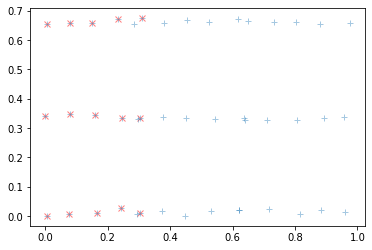

In [155]:
f,pl = plt.subplots(num='dither', clear=True)

#xTarget, yTarget = nirander.xStepToPix(frames.xstep), nirander.yStepToPix(frames.ystep)

#pl.plot(xTarget, yTarget, 'ro')
minx, miny = frames.xpix.min(), frames.ypix.min()
lineStart = frames[frames.xstep == frames.xstep.min()]
pl.plot(lineStart.xpix - minx, lineStart.ypix - miny, 'rx', alpha=0.5)
pl.plot(frames.xpix - minx, frames.ypix -  miny, '+', alpha=0.4)


In [156]:
f.savefig('n1_dither_repeats.pdf')

In [259]:
nirander.measureSet(frames, hxCalib, center=[[2250,2040]])

got 46 spots near [[2250, 2040]]
got 46 spots near [[2250, 2040]]
got 45 spots near [[2250, 2040]]


KeyboardInterrupt: 

In [264]:
vl = 7823,7824, 7825

dispVisits(vl, hxCalib, d1)